#Install dan Import

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 18 kB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 


In [ ]:
import glob
import numpy as np
import pandas as pd
import cv2
import easyocr
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

#Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/OFA/PA/Dataset

/content/gdrive/MyDrive/OFA/PA/Dataset


#Membaca Dataset dan Membuat DataFrame

In [ ]:
data = pd.DataFrame()

In [ ]:
list_gambar = []
list_label = []

files = glob.glob(r'*')
for my_file in files:
  # print(my_file)
  list_gambar.append(my_file)
  my_file = my_file.lower()
  list_label.append(my_file.replace('.jpg',''))

data['gambar'] = list_gambar
data['label'] = list_label

In [ ]:
data.head()

,gambar,label
0,99.jpg,99
1,cabot place.jpg,cabot place
2,priory galleries at the ship.jpg,priory galleries at the ship
3,no unauthorised entry into this area permit to...,no unauthorised entry into this area permit to...
4,check signal cable.jpg,check signal cable


#Fungsi-Fungsi

In [ ]:
def imageToStringEasyOcr(img, reader):
  teks = reader.readtext(img, paragraph = True)
  tulisan = []
  for i in teks:
    tulisan.append(i[1])
  return tulisan

def listToString(s):
    str1 = " "
    string = (str1.join(s))
    string = string.lower() 
     
    return string

def stringToList(l):
  return (l.split(" "))

def cek(l1, order):
  x, ben, sal, kesel = 0, 0, 0, 0
  l2 = data['label'].iloc[order]
  l2 = stringToList(l2)
  for i in l2:
    if i in l1:
      x += 1
  ben += x
  sal += len(l2) - x
  kesel += len(l2)

  return ben, sal, kesel, l2

def readImage(order):
  return cv2.imread(data['gambar'].iloc[order])

def pipeLine(img, reader):
  teks = imageToStringEasyOcr(img, reader)
  teks = listToString(teks)
  teks = stringToList(teks)
  
  return teks

#Mengecek EasyOCR

In [ ]:
%%time
#Dipilih reader dalam bahasa Inggris
reader = easyocr.Reader(['en'])

jumlahBener, jumlahSalah, jumlahKeseluruhan = 0, 0, 0
listKurang = []
listSempurna = []
listAkurasi = []

for i in range(data.shape[0]):
  print(f'Gambar ke-{i+1}')
  img = readImage(i)
  teks = pipeLine(img, reader)
  img = cv2.resize(img, (400,400))
  cv2_imshow(img)
  print(f'Deteksi\t: {teks}')
  bener, salah, keseluruhan, l2 = cek(teks, i)
  print(f'Label\t: {l2}')
  print(f'Benar\t: {bener}')
  print(f'Salah\t: {salah}')
  persen = (bener/len(l2))*100
  print(f'Presentase\t:{persen}%')
  if persen < 50:
    listKurang.append(i)
  elif int(persen) == 100:
    listSempurna.append(i)
  print()
  jumlahBener += bener; jumlahSalah += salah; jumlahKeseluruhan += keseluruhan; akurasi = (jumlahBener/jumlahKeseluruhan)*100
  listAkurasi.append(akurasi)

##Perhitungan Keseluruhan

In [ ]:
print(f'Jumlah Benar Keseluruhan Adalah\t\t:{jumlahBener}')
print(f'Jumlah Salah Keseluruhan Adalah\t\t:{jumlahSalah}')
print(f'Jumlah Kalimat Keseluruhan Adalah\t:{jumlahKeseluruhan}')
print(f'Presentase Keseluruhan Adalah\t\t:{(jumlahBener/jumlahKeseluruhan)*100}%')

Jumlah Benar Keseluruhan Adalah		:637
Jumlah Salah Keseluruhan Adalah		:301
Jumlah Kalimat Keseluruhan Adalah	:938
Presentase Keseluruhan Adalah		:67.91044776119402%


In [ ]:
listAkurasi

[0.0,
 66.66666666666666,
 62.5,
 78.26086956521739,
 80.76923076923077,
 76.66666666666667,
 78.125,
 76.47058823529412,
 80.48780487804879,
 79.06976744186046,
 80.43478260869566,
 79.59183673469387,
 75.47169811320755,
 75.92592592592592,
 77.19298245614034,
 78.33333333333333,
 79.6875,
 79.1044776119403,
 77.94117647058823,
 78.87323943661971,
 78.37837837837837,
 79.22077922077922,
 83.80952380952381,
 84.40366972477065,
 82.14285714285714,
 79.83193277310924,
 80.0,
 79.50819672131148,
 77.95275590551181,
 78.125,
 78.78787878787878,
 78.19548872180451,
 78.26086956521739,
 78.57142857142857,
 78.87323943661971,
 80.0,
 79.5031055900621,
 79.75460122699386,
 79.8780487804878,
 78.69822485207101,
 78.23529411764706,
 77.32558139534885,
 76.96629213483146,
 76.11111111111111,
 76.37362637362637,
 76.88172043010752,
 76.47058823529412,
 76.28865979381443,
 77.11442786069652,
 77.5609756097561,
 78.19905213270142,
 78.70370370370371,
 78.26086956521739,
 78.38983050847457,
 77.68595

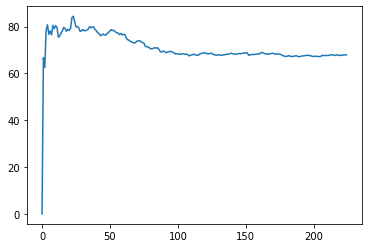

In [ ]:
plt.plot(listAkurasi, label='Akurasi')

##Kurang dari 50%

In [ ]:
print(f'Terdapat {len(listKurang)} Gambar Dibawah 50%')
for i in listKurang:
  print(f'Gambar ke-{i+1}')
  img = readImage(i)
  teks = pipeLine(img, reader)
  img = cv2.resize(img, (400,400))
  cv2_imshow(img)
  print(f'Deteksi\t: {teks}')
  bener, salah, keseluruhan, l2 = cek("", i)
  print(f'Label\t: {l2}')
  print()

##Sempurna 100%

In [ ]:
print(len(listSempurna))
for i in listSempurna:
  print(f'Gambar ke-{i+1}')
  img = readImage(i)
  teks = pipeLine(img, reader)
  img = cv2.resize(img, (400,400))
  cv2_imshow(img)
  print(f'Deteksi\t: {teks}')
  bener, salah, keseluruhan, l2 = cek('', i)
  print(f'Label\t: {l2}')
  print()